# Load and plot radiation data from HZDR cloud(the first given data)

In [1]:
import h5py as h5

readfile = "../from_cloud/b_radAmplitudes_68500_0_0_0.h5"
f = h5.File(readfile, 'r')

In [7]:
import sys
sys.path.append('../main/ModelHelpers/cINN/model/modules')
import radiation
from data_preprocessing import h5_tree
import numpy as np

def h5_tree(val, pre=''):
    items = len(val)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5._hl.group.Group:
                print(pre + '└── ' + key)
                h5_tree(val, pre+'    ')
            else:
                print(pre + '└── ' + key + ' (%d)' % len(val))
        else:
            if type(val) == h5._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                print(pre + '├── ' + key + ' (%d)' % len(val))

In [3]:
h5_tree(f)
list(f.keys())

└── data
    └── 68500
        └── DetectorMesh
            ├── Amplitude
            │   ├── x_Im (440)
            │   ├── x_Re (440)
            │   ├── y_Im (440)
            │   ├── y_Re (440)
            │   ├── z_Im (440)
            │   └── z_Re (440)
            ├── DetectorDirection
            │   ├── x (440)
            │   ├── y (440)
            │   └── z (440)
            └── DetectorFrequency
                └── omega (1)


['data']

In [4]:
dataAmpl_x_Im = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('x_Im')[:]
dataAmpl_x_Re = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('x_Re')[:]
dataAmpl_y_Im = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('y_Im')[:]
dataAmpl_y_Re = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('y_Re')[:]
dataAmpl_z_Im = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('z_Im')[:]
dataAmpl_z_Re = f.get('data').get('68500').get('DetectorMesh').get('Amplitude').get('z_Re')[:]

dataDetector_x = f.get('data').get('68500').get('DetectorMesh').get('DetectorDirection').get('x')[:]
dataDetector_y = f.get('data').get('68500').get('DetectorMesh').get('DetectorDirection').get('y')[:]
dataDetector_z = f.get('data').get('68500').get('DetectorMesh').get('DetectorDirection').get('z')[:]

dataFreq = f.get('data').get('68500').get('DetectorMesh').get('DetectorFrequency').get('omega')[:]

In [5]:
arr = np.stack((dataAmpl_x_Im, dataAmpl_x_Re, dataAmpl_y_Im, dataAmpl_y_Re), axis=2)
print(arr.shape)

(440, 2048, 4, 1)


In [6]:
print(dataAmpl_x_Im.shape)
print(dataDetector_x.shape)
print(dataFreq.shape)

(440, 2048, 1)
(440, 1, 1)
(1, 2048, 1)


(2048,)
(440,)
(2048,)


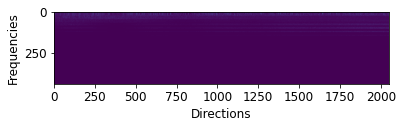

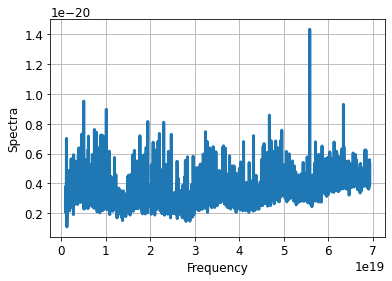

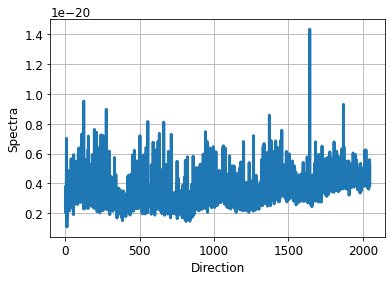

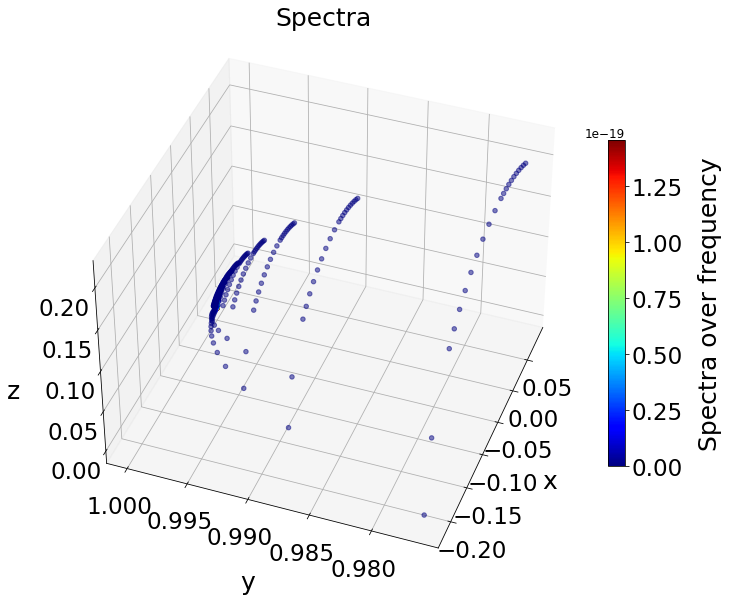

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as tick
from matplotlib import cm

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['lines.linewidth']=3
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

radiation_sim = radiation.RadiationData(readfile)
spectra = radiation_sim.get_Spectra()

integrate_over_direction = np.sum(spectra, axis=0)
integrate_over_frequency = np.sum(spectra, axis=1)
print(integrate_over_direction.shape)
print(integrate_over_frequency.shape)

frequency = radiation_sim.get_omega()
print(frequency.shape)

spectra = radiation_sim.get_Spectra()
#1st dim: direction, 2nd dim: frequency
plt.imshow(spectra)
plt.xlabel('Directions')
plt.ylabel('Frequencies')
plt.show()

integrate_over_direction = np.sum(spectra, axis=0)
integrate_over_frequency = np.sum(spectra, axis=1)

frequency = radiation_sim.get_omega()
n_vec_directions = radiation_sim.get_vector_n()

plt.plot(frequency, integrate_over_direction)
plt.xlabel('Frequency')
plt.ylabel('Spectra')
plt.grid(True)
plt.show()

plt.plot(np.arange(0, integrate_over_direction.shape[0], 1), integrate_over_direction)
plt.xlabel('Direction')
plt.ylabel('Spectra')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

norm = matplotlib.colors.Normalize(vmin=np.min(integrate_over_frequency),
                            vmax=np.max(integrate_over_frequency))

ax.scatter(n_vec_directions[:,0], n_vec_directions[:, 1], n_vec_directions[:, 2], 
       c=plt.cm.jet(norm(integrate_over_frequency)), s=20, alpha=0.5)
ax.view_init(40, 200)

m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
cb = plt.colorbar(m, shrink=0.6, pad=0.01)
cb.ax.tick_params(labelsize=23)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('Spectra over frequency', fontsize=25)

ax.set_xlabel('x', fontsize=25, linespacing=5.2)
ax.set_ylabel('y', fontsize=25, linespacing=5.2)
ax.set_zlabel('z', fontsize=25, linespacing=5.2)
ax.dist = 10

ax.xaxis.set_tick_params(labelsize=23)
ax.yaxis.set_tick_params(labelsize=23)
ax.zaxis.set_tick_params(labelsize=23)
ax.xaxis.labelpad=30
ax.yaxis.labelpad=30
ax.zaxis.labelpad=30

ax.tick_params(axis='both', which='major', pad=10)

ax.xaxis._axinfo['label']['space_factor'] = 5.0
ax.yaxis._axinfo['label']['space_factor'] = 5.0
ax.zaxis._axinfo['label']['space_factor'] = 5.0

ax.set_title('Spectra', fontsize=25)

plt.show()